In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
listings_df = pd.read_csv('./listings.csv')
listings_df['price'] = listings_df['price'].replace('[\$,]', '', regex=True).astype(float)

In [19]:
listings_df['cleaning_fee']

0        $35.00
1        $10.00
2           NaN
3        $50.00
4        $15.00
5        $30.00
6           NaN
7        $10.00
8           NaN
9        $50.00
10       $30.00
11       $40.00
12       $40.00
13       $50.00
14      $150.00
15          NaN
16       $50.00
17       $20.00
18          NaN
19          NaN
20          NaN
21       $50.00
22          NaN
23      $100.00
24      $100.00
25       $10.00
26          NaN
27       $15.00
28          NaN
29       $40.00
         ...   
3555     $20.00
3556        NaN
3557     $20.00
3558    $130.00
3559    $100.00
3560     $80.00
3561        NaN
3562        NaN
3563        NaN
3564        NaN
3565        NaN
3566        NaN
3567     $95.00
3568        NaN
3569        NaN
3570     $20.00
3571        NaN
3572     $95.00
3573     $25.00
3574        NaN
3575        NaN
3576     $85.00
3577        NaN
3578        NaN
3579     $10.00
3580        NaN
3581     $15.00
3582        NaN
3583        NaN
3584     $25.00
Name: cleaning_fee, Leng

In [4]:
listings_df.shape

(3585, 95)

In [11]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

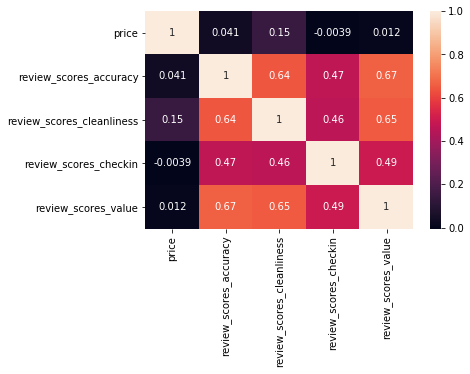

In [17]:
sns.heatmap(listings_df[['price', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
             'review_scores_value']].corr(),annot=True);

In [39]:
calendar_df = pd.read_csv('./calendar.csv')

# Remove listings that don't have a price
calendar_df.dropna(subset=['price'], inplace=True) 

# Convert price from object with '$' and ',' to float
calendar_df['price'] = calendar_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Only one value ('t') as listed price means it's available
calendar_df.drop('available', axis=1, inplace=True) 
calendar_df.head()

,listing_id,date,price
365,3075044,2017-08-22,65.0
366,3075044,2017-08-21,65.0
367,3075044,2017-08-20,65.0
368,3075044,2017-08-19,75.0
369,3075044,2017-08-18,75.0


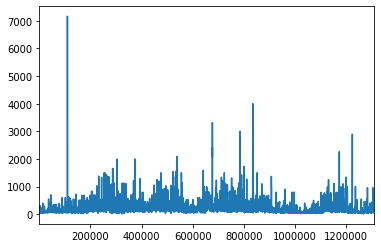

In [36]:
calendar_df['price'].plot()

In [40]:
reviews_df = pd.read_csv('./reviews.csv')

In [42]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [50]:
list(listings_df.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


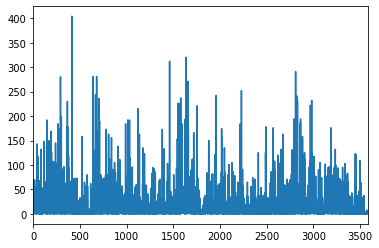

In [51]:
listings_df['number_of_reviews'].plot()

### Idea 1 - See if listings are above/below expected listing for a given property/date etc, then check if the reviews are positively/negatively correlated based on this

### Idea 2 - How do dates affect pricing? Perhaps split out by low-/mid-/high- end properties

### Idea 3 - Can we predict how well somebody will be reviewed in their lifetime from their first review?
### Idea 3.5 - Does number of reviews have any effect, are there trends in people being more highly reviewed as they become more experienced?

### Idea 4 - How do reviews compare across different cost properties, eg are they positively correlated, do they vary less at the high-end?

### Idea 5 - Does host-flexibility (e.g. requires guest pic/phone/license etc) affect pricing/reviews/host-acceptance-time or rate?

### Idea 6 - How much do extra bathrooms matter?